In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
np.random.seed(0)
x = np.random.rand(100)
y = np.random.rand(100)
sizes = np.random.rand(100) * 1000  # Random sizes for raindrops

# Create a scatter plot with custom marker
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=sizes, alpha=0.5)

plt.title('Raindrop Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample dataset (replace with your actual data)
k6_scores_group1 = np.random.randint(0, 30, size=50)
k6_scores_group2 = np.random.randint(0, 30, size=50)
k6_scores_group3 = np.random.randint(0, 30, size=50)
k6_scores_group4 = np.random.randint(0, 30, size=50)

# Data for x-axis (groups)
groups = ['Group 1', 'Group 2', 'Group 3', 'Group 4']

# Create figure and axes
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), sharey=True)

# Plot violin plots on the right side
axs[0].violinplot([k6_scores_group1, k6_scores_group2, k6_scores_group3, k6_scores_group4], showmeans=False, showmedians=True)
axs[0].set_xticks(np.arange(1, len(groups) + 1))
axs[0].set_xticklabels(groups)
axs[0].set_title('Violin Plot')

# Plot scatter plots on the left side
for i, k6_scores in enumerate([k6_scores_group1, k6_scores_group2, k6_scores_group3, k6_scores_group4]):
    x = np.random.normal(i + 1, 0.1, size=len(k6_scores))
    axs[1].scatter(x, k6_scores, alpha=0.5)
axs[1].set_xticks(np.arange(1, len(groups) + 1))
axs[1].set_xticklabels(groups)
axs[1].set_title('Scatter Plot')

# Plot box plots in the center
axs[2].boxplot([k6_scores_group1, k6_scores_group2, k6_scores_group3, k6_scores_group4], showmeans=True)
axs[2].set_xticks(np.arange(1, len(groups) + 1))
axs[2].set_xticklabels(groups)
axs[2].set_title('Box Plot')

# Set common y-label
fig.text(0.04, 0.5, 'K6 Score', va='center', rotation='vertical')

plt.tight_layout()
plt.show()


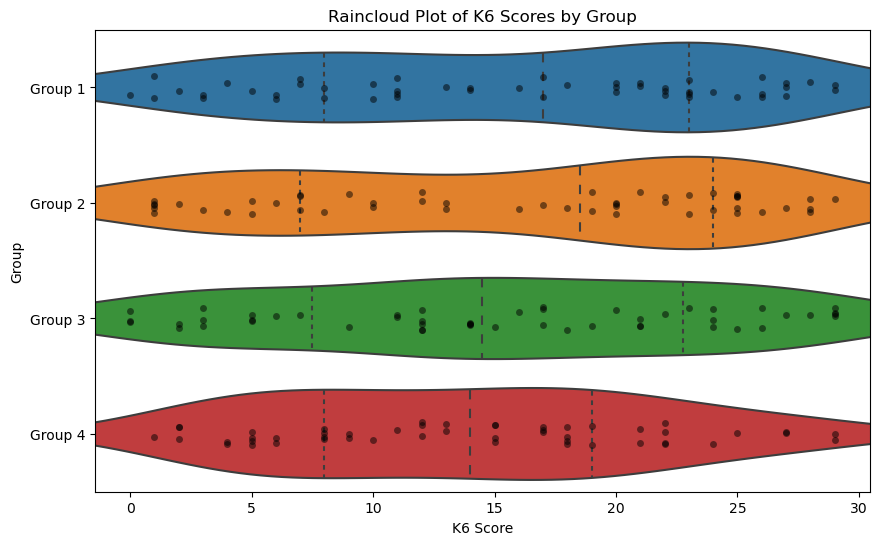

In [12]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset (replace with your actual data)
k6_scores_group1 = np.random.randint(0, 30, size=50)
k6_scores_group2 = np.random.randint(0, 30, size=50)
k6_scores_group3 = np.random.randint(0, 30, size=50)
k6_scores_group4 = np.random.randint(0, 30, size=50)

# Combine data into a DataFrame
data = pd.DataFrame({'Group 1': k6_scores_group1,
                     'Group 2': k6_scores_group2,
                     'Group 3': k6_scores_group3,
                     'Group 4': k6_scores_group4})

# Melt the data to long format
data_melted = data.melt(var_name='Group', value_name='K6 Score')

# Create a raincloud plot using seaborn
plt.figure(figsize=(10, 6))
sns.violinplot(data=data_melted, x='K6 Score', y='Group', inner='quartile')
sns.stripplot(data=data_melted, x='K6 Score', y='Group', color='k', alpha=0.5)
plt.xlabel('K6 Score')
plt.ylabel('Group')
plt.title('Raincloud Plot of K6 Scores by Group')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset (replace with your actual data)
k6_scores_group1 = np.random.randint(0, 30, size=50)
k6_scores_group2 = np.random.randint(0, 30, size=50)
k6_scores_group3 = np.random.randint(0, 30, size=50)
k6_scores_group4 = np.random.randint(0, 30, size=50)

# Combine data into a DataFrame
data = {'Group': ['Group 1'] * len(k6_scores_group1) + ['Group 2'] * len(k6_scores_group2) +
                 ['Group 3'] * len(k6_scores_group3) + ['Group 4'] * len(k6_scores_group4),
        'K6 Score': np.concatenate([k6_scores_group1, k6_scores_group2, k6_scores_group3, k6_scores_group4])}
df = pd.DataFrame(data)

# Create raincloud plot using matplotlib
plt.figure(figsize=(10, 6))

# Half-violin plot
sns.violinplot(data=df, x='Group', y='K6 Score', inner=None, linewidth=0, cut = 0)
sns.violinplot(data=df, x='Group', y='K6 Score', inner=None, linewidth=0, scale='width', width=0.6, offset=-0.2, cut = 0)

# Box plot
sns.boxplot(data=df, x='Group', y='K6 Score', width=0.15, color='white', showfliers=False)

# Dot plot
for i, group_data in enumerate([k6_scores_group1, k6_scores_group2, k6_scores_group3, k6_scores_group4]):
    y_values = np.random.normal(i + 1, 0.03, size=len(group_data))
    plt.plot(group_data, y_values, 'ko', alpha=0.5)

# Adjust x-axis limits to remove white space on the sides
plt.xlim(0.8, 4.2)

plt.xlabel('Group')
plt.ylabel('K6 Score')
plt.title('Raincloud Plot of K6 Scores by Group')
plt.show()


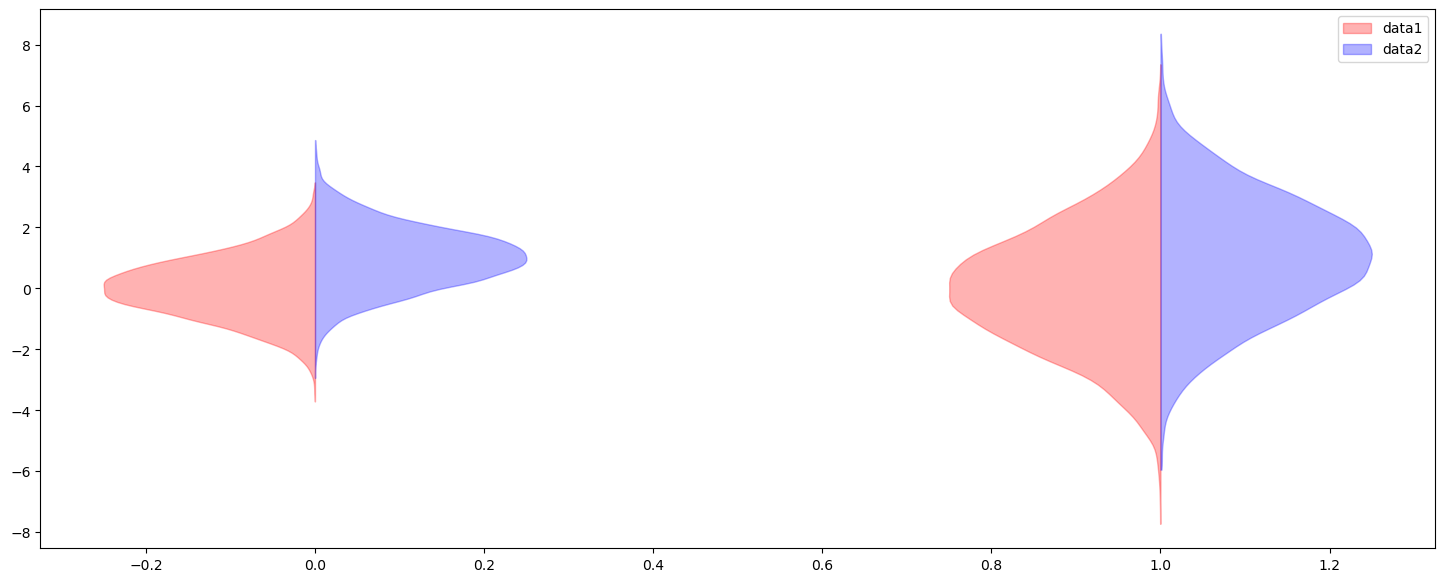

In [24]:
data1 = (np.random.normal(0, 1, size=10000), np.random.normal(0, 2, size=10000))
data2 = (np.random.normal(1, 1, size=10000), np.random.normal(1, 2, size=10000))


fig, ax = plt.subplots(figsize=(18, 7))

v1 = ax.violinplot(data1, points=100, positions=np.arange(0, len(data1)),
               showmeans=False, showextrema=False, showmedians=False)
for b in v1['bodies']:
    # get the center
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further right than the center
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
    b.set_color('r')


v2 = ax.violinplot(data2, points=100, positions=np.arange(0, len(data2)), 
               showmeans=False, showextrema=False, showmedians=False)

for b in v2['bodies']:
    # get the center
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further left than the center
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
    b.set_color('b')

ax.legend([v1['bodies'][0],v2['bodies'][0]],['data1', 'data2'])

plt.show()

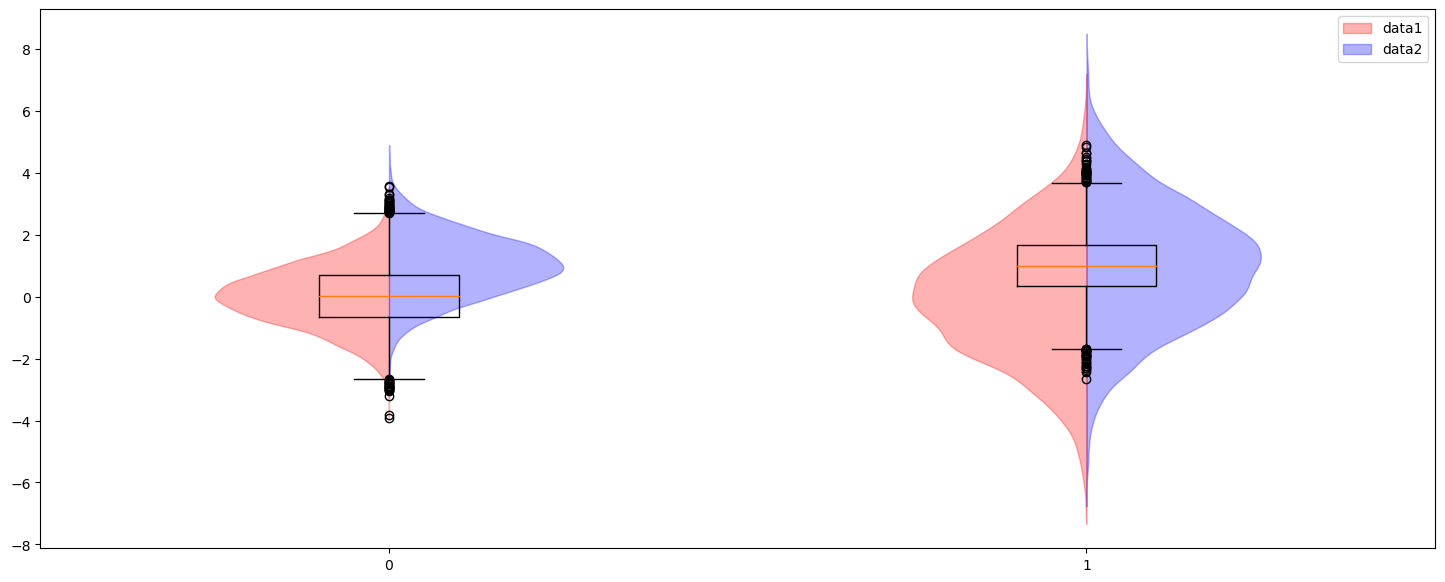

In [22]:
import numpy as np
import matplotlib.pyplot as plt

data1 = (np.random.normal(0, 1, size=10000), np.random.normal(0, 2, size=10000))
data2 = (np.random.normal(1, 1, size=10000), np.random.normal(1, 2, size=10000))

fig, ax = plt.subplots(figsize=(18, 7))

v1 = ax.violinplot(data1, points=100, positions=np.arange(0, len(data1)),
                   showmeans=False, showextrema=False, showmedians=False)
for b in v1['bodies']:
    # get the center
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further right than the center
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
    b.set_color('r')

v2 = ax.violinplot(data2, points=100, positions=np.arange(0, len(data2)),
                   showmeans=False, showextrema=False, showmedians=False)
for b in v2['bodies']:
    # get the center
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further left than the center
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
    b.set_color('b')

# Plot box plot overlapping the violin plots
box_x1 = np.random.normal(0, 0.05, size=10000)  # Adjust this scale factor for box width
box_x2 = np.random.normal(1, 0.05, size=10000)  # Adjust this scale factor for box width

ax.boxplot([data1[0], data2[0]], positions=[0, 1], widths=0.2)

ax.legend([v1['bodies'][0], v2['bodies'][0]], ['data1', 'data2'])

plt.show()


In [25]:
# Generate random distribution of integers between 0-10 as the first feature
x1 = np.random.choice([0,1,2,3,4,5,6,7,8,9,10], p=[0.01, 0.01, 0.15, 0.19, 0.05, 0.11, 0.2, 0.16, 0.10, 0.01, 0.01], size=(500))

# Apply random noise on each sample so they don't overlap on the x-axis in scatter plot
idxs = np.arange(len(x1))
out = x1.astype(float)
out.flat[idxs] += np.random.uniform(low=-1, high=1, size=len(idxs))
x1 = out

# Generate random distribution of integers between 6-17 as the second feature
x2 = np.random.choice([6,7,8,9,10,11,12,13,14,15,16,17], p=[0.01, 0.01, 0.15, 0.23, 0.14, 0.06, 0.05, 0.10, 0.12, 0.11, 0.01, 0.01], size=(500))

# Apply random noise on each sample so they don't overlap on the y-axis in scatter plot
idxs = np.arange(len(x2))
out = x2.astype(float)
out.flat[idxs] += np.random.uniform(low=-1, high=1, size=len(idxs))
x2 = out

# Combine features in a list
data_x = [x1, x2]

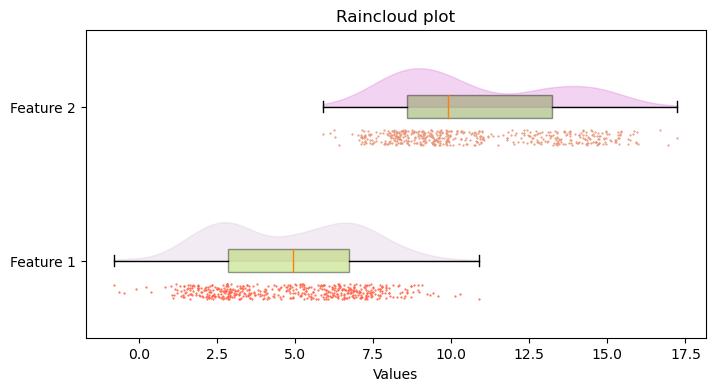

In [26]:
fig, ax = plt.subplots(figsize=(8, 4))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['yellowgreen', 'olivedrab']

# Boxplot data
bp = ax.boxplot(data_x, patch_artist = True, vert = False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['thistle', 'orchid']

# Violinplot data
vp = ax.violinplot(data_x, points=500, 
               showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['tomato', 'darksalmon']

# Scatterplot data
for idx, features in enumerate(data_x):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    plt.scatter(features, y, s=.3, c=scatter_colors[idx])

plt.yticks(np.arange(1,3,1), ['Feature 1', 'Feature 2'])  # Set text labels.
plt.xlabel('Values')
plt.title("Raincloud plot")
plt.show()